In [19]:
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import interpret

In [2]:
def group_by_filename(args):
    filename = args['out']
    filename = filename.replace("\\", "/").split("/")[-1].split(".")[0].split("-")
    short_names = [p[0] + p[-1] for p in filename if p[0] in string.ascii_uppercase]
    return '-'.join(short_names)


groupped_results = interpret.import_from_dir("../results/best/", group_by_filename)
results_df = interpret.convert_to_dataframe(groupped_results)

In [18]:
run_lengths = results_df.groupby("group").gen.max().to_dict()

In [23]:
end_results = []
for group, run_length in run_lengths.items():
    end_results.append(results_df[(results_df.group == group) & (results_df.gen == run_length)].copy())
end_results = pd.concat(end_results)

end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()

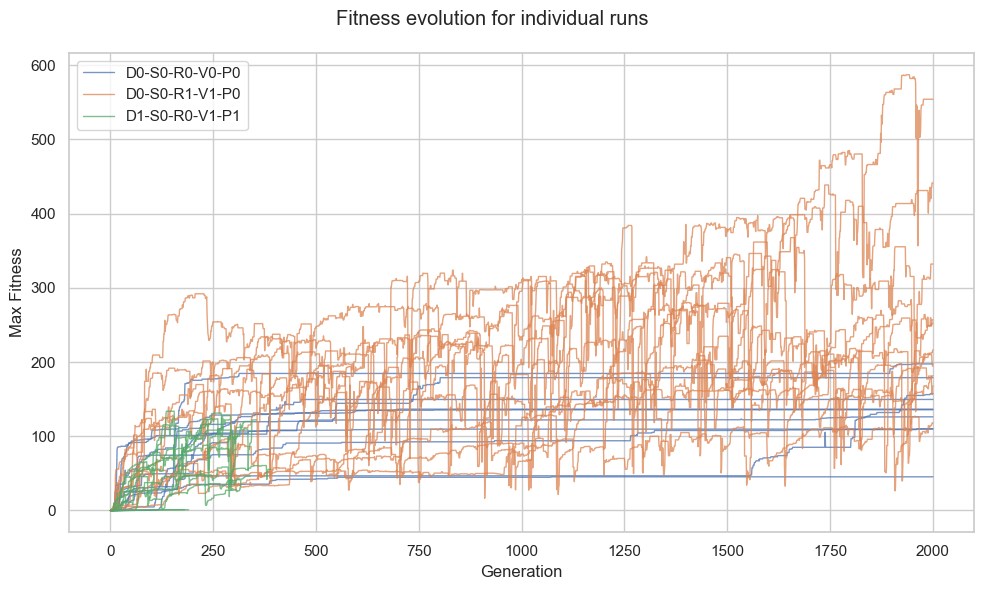

In [11]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharey=True, sharex=True)

sns.lineplot(x="gen", y="max", hue="group", data=results_df, units="run_idx", estimator=None, lw=1, ax=ax, legend=True, alpha=0.75)
ax.legend(loc='upper left')
ax.set_ylabel("Max Fitness")
ax.set_xlabel("Generation")

plt.suptitle("Fitness evolution for individual runs")
plt.tight_layout()
plt.show()

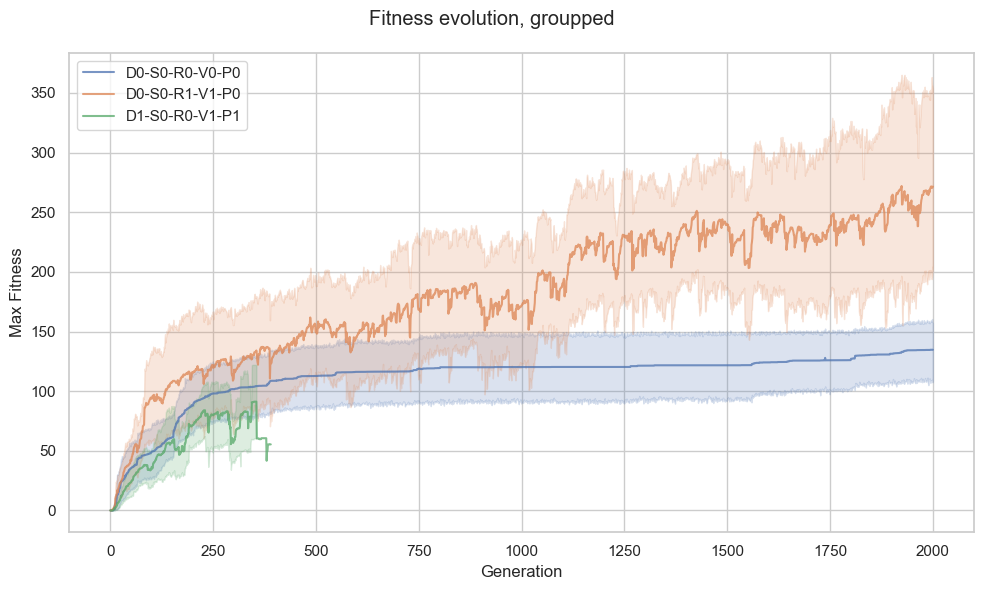

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharey=True, sharex=True)

sns.lineplot(x="gen", y="max", hue="group", data=results_df, ax=ax, legend=True, alpha=0.75)
ax.legend(loc='upper left')
ax.set_ylabel("Max Fitness")
ax.set_xlabel("Generation")

plt.suptitle("Fitness evolution, groupped")
plt.tight_layout()
plt.show()

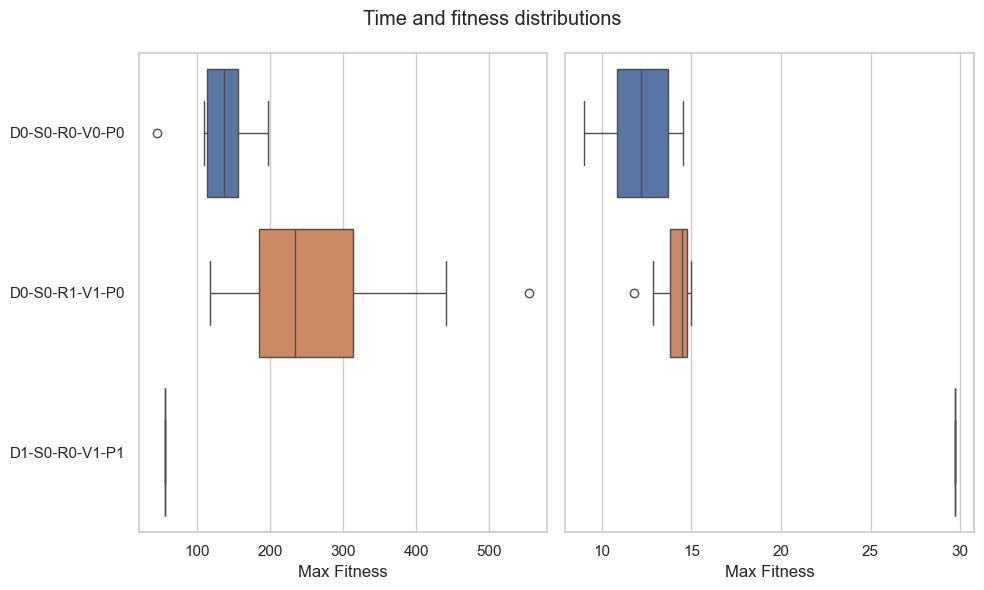

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True, sharex=False)

sns.boxplot(x="max", y="group", hue="group", data=end_results, ax=axs[0])
sns.boxplot(x="gen_time_s", y="group", hue="group", data=end_results, ax=axs[1])
axs[0].set_xlabel("Max Fitness")
axs[0].set_ylabel("")
axs[1].set_xlabel("Time Per Generation [s]")

plt.xlabel("Max Fitness")
plt.suptitle("Time and fitness distributions")
plt.tight_layout()
plt.show()